In [4]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install folium

#Import Primary Modules:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium



   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



In [9]:
# import requests
# import pandas as pd
# from js import fetch
# import io


URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/d51iMGfp_t0QpO30Lym-dw/automobile-sales.csv"
# response = requests.get(URL)
# response.raise_for_status()
# csv_content = io.StringIO(response.text)
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

print(df.head())

Data downloaded and read into a dataframe!
         Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1980-01-31  1980   Jan          1               108.24                0.45   
1  1980-01-31  1980   Jan          1               108.24                0.45   
2  1980-01-31  1980   Jan          1               108.24                0.36   
3  1980-01-31  1980   Jan          1               108.24                0.38   
4  1980-02-29  1980   Feb          1                98.75                0.46   

   Price  Advertising_Expenditure  Competition    GDP  Growth_Rate  \
0  27704                   1417.5            7  60.22         0.01   
1  77270                    763.7            7  60.22         0.01   
2  19665                   1417.5            7  60.22         0.01   
3  36986                   1417.5            7  60.22         0.01   
4  26609                   2773.4            4  45.99        -0.31   

   unemployment_rate  Automobile_Sales     Vehicl

In [10]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,2001.520833,0.224432,101.210890,0.737756,41469.506155,2879.743655,6.118845,40.205748,-0.237074,2.441525,3164.160511
std,12.535031,0.417306,10.634092,0.286092,21388.409141,1175.338324,1.964292,16.291271,0.859691,1.108472,3640.137399
min,1980.000000,0.000000,73.900000,0.250000,15001.000000,494.200000,3.000000,12.510000,-4.230000,1.000000,40.000000
25%,1991.000000,0.000000,94.060000,0.500000,22039.000000,1872.000000,4.000000,27.210000,-0.570000,1.600000,923.000000
50%,2002.000000,0.000000,100.800000,0.810000,34957.500000,2883.500000,6.000000,39.420000,-0.005000,2.300000,2381.500000
75%,2012.000000,0.000000,108.320000,0.940000,57418.250000,3902.425000,8.000000,53.862500,0.392500,2.900000,4363.500000
max,2023.000000,1.000000,131.670000,1.500000,79998.000000,4983.000000,9.000000,70.370000,0.820000,6.000000,65645.000000


In [11]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

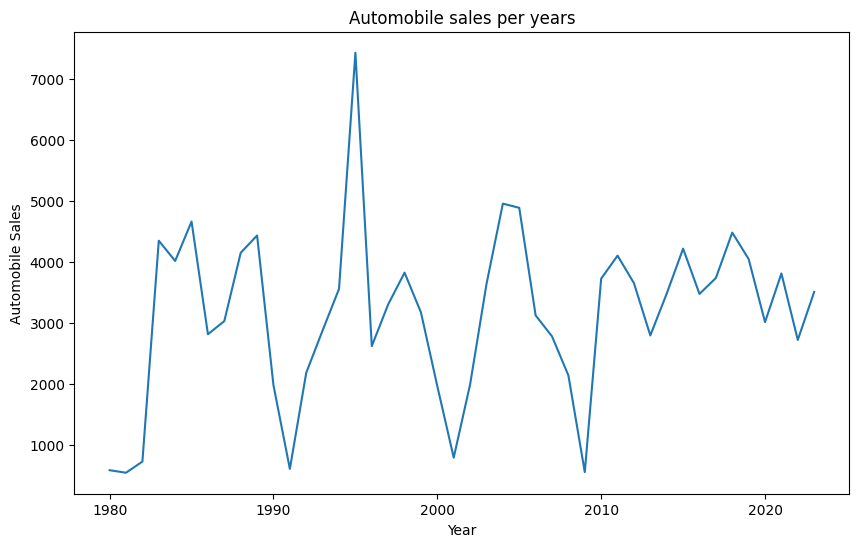

In [23]:
# TASK 1.1: Develop a Line chart using the functionality of pandas to show how Average automobile sales fluctuate from year to year

df_line = df.groupby("Year")["Automobile_Sales"].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind="line")
plt.title("Automobile sales per years")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.show()



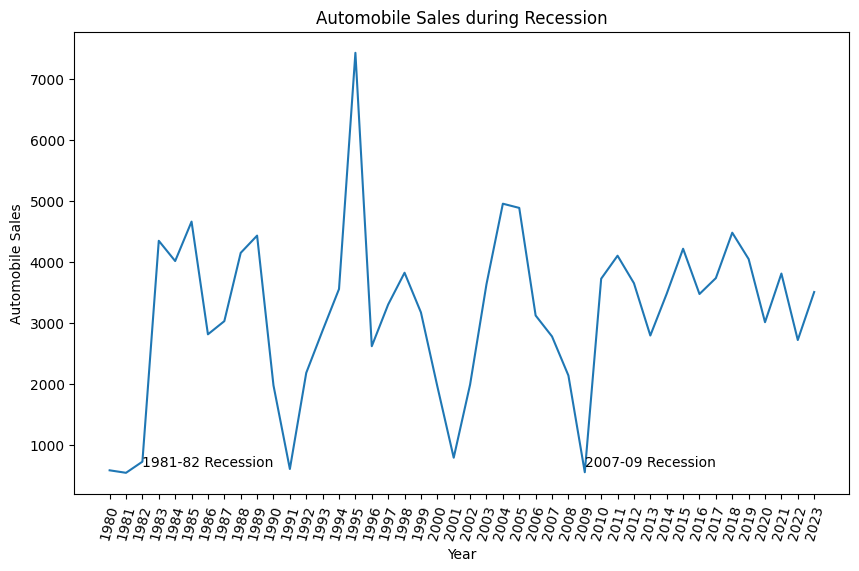

In [26]:
plt.figure(figsize=(10, 6))
df_line.plot(x="Year", y="Automobile_Sales", kind="line")
plt.xticks(list(range(df.Year.min(), df.Year.max()+1)), rotation=75)

plt.text(1982, 650, '1981-82 Recession')
plt.text(2009, 650, '2007-09 Recession')

plt.title("Automobile Sales during Recession")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")

plt.show()

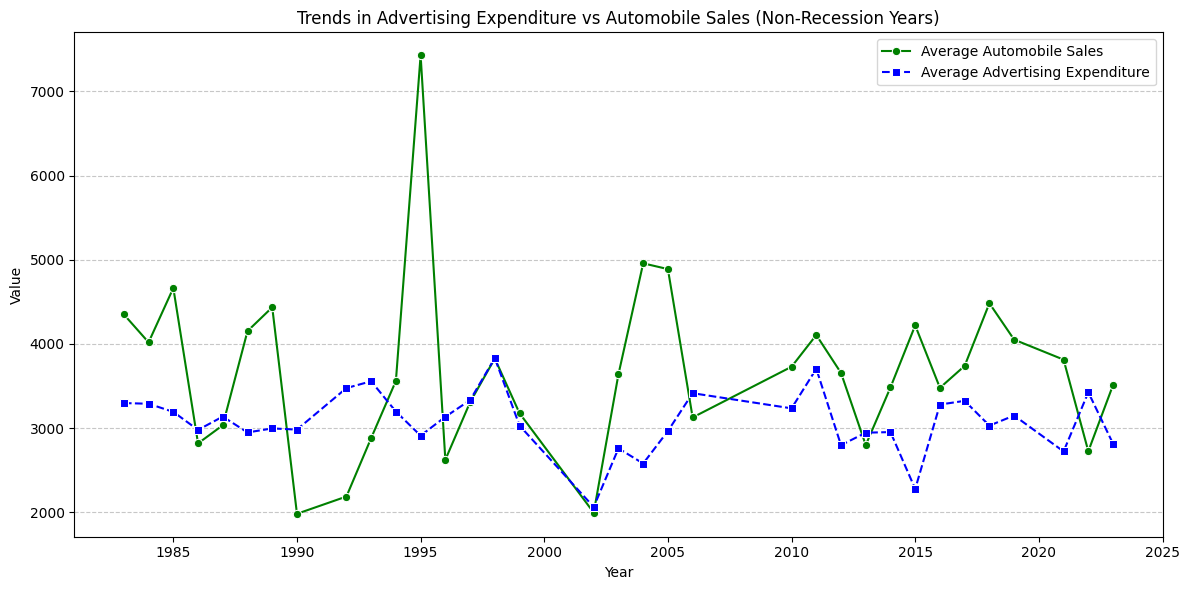

In [28]:
# Filter for non‑recession years
df_non_rec = df[df['Recession'] == 0]

# Group by Year and compute averages
df_trends = df_non_rec.groupby('Year', as_index=False).agg(
    Avg_Sales=('Automobile_Sales', 'mean'),
    Avg_Ad_Spend=('Advertising_Expenditure', 'mean')
)

# Plot trends
plt.figure(figsize=(12, 6))

# Automobile Sales Trend
sns.lineplot(
    data=df_trends,
    x='Year',
    y='Avg_Sales',
    marker='o',
    linestyle='-',
    color='green',
    label='Average Automobile Sales'
)

# Advertising Expenditure Trend
sns.lineplot(
    data=df_trends,
    x='Year',
    y='Avg_Ad_Spend',
    marker='s',
    linestyle='--',
    color='blue',
    label='Average Advertising Expenditure'
)

# Labels and formatting
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends in Advertising Expenditure vs Automobile Sales (Non‑Recession Years)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



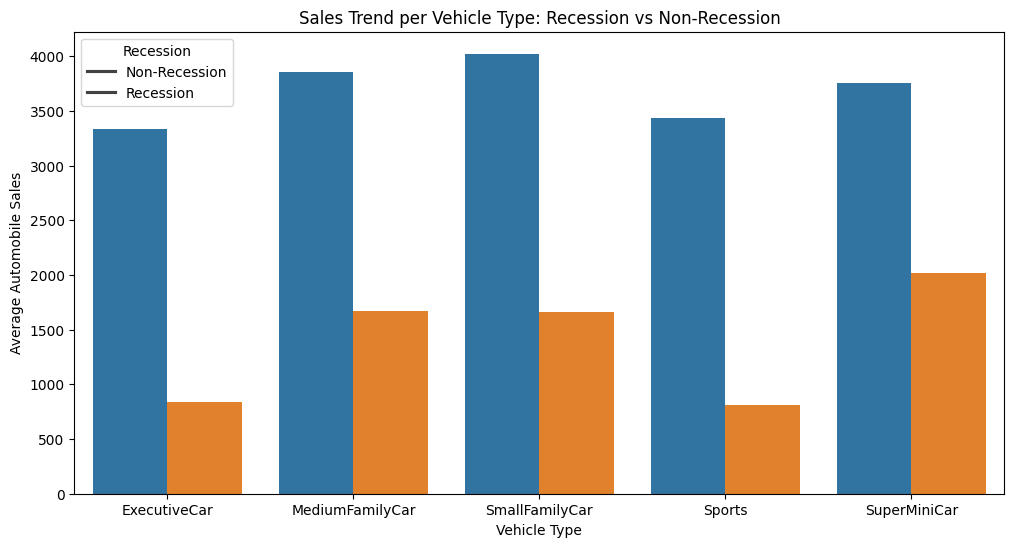

In [30]:
new_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=new_df)

plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Sales Trend per Vehicle Type: Recession vs Non-Recession')
plt.legend(title='Recession', labels=['Non-Recession', 'Recession'])

plt.show()


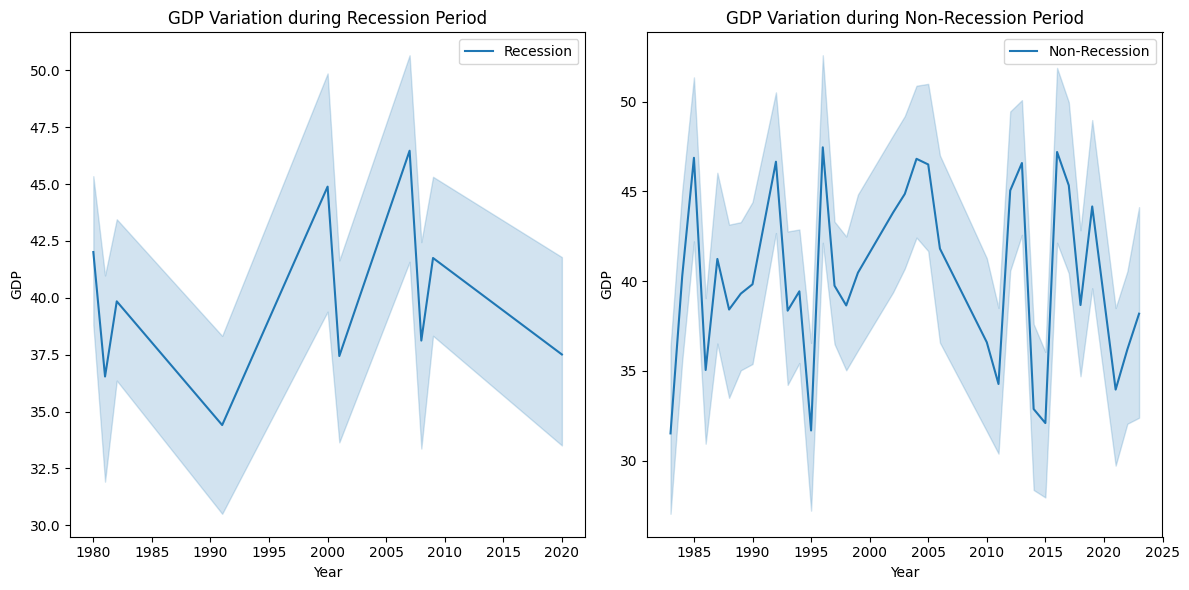

In [46]:
# fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# df_rec = df[df["Recession"] == 1]
# df_no_rec = df[df["Recession"] == 0]

# df_rec[["GDP", "Year"]].groupby("Year").mean().reset_index().plot(
#     kind="line",
#     x="Year",
#     y="GDP",
#     ax=axs[0],
#     ylabel="Average GDP",
#     title="Average GDP per Year in recession periods",
# )
# df_no_rec[["GDP", "Year"]].groupby("Year").mean().reset_index().plot(
#     kind="line",
#     x="Year",
#     y="GDP",
#     ax=axs[1],
#     title="Average GDP per Year in non-recession periods",
# )

# fig.suptitle("Comparing GDP in Recession and Non-recession periods", fontsize=15)

rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2 ) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()


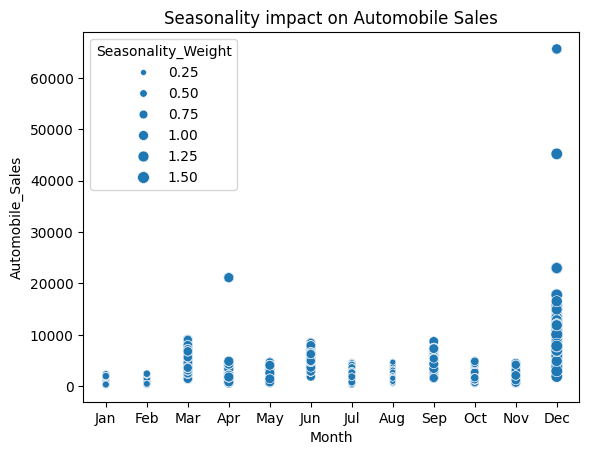

In [43]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    
    #you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

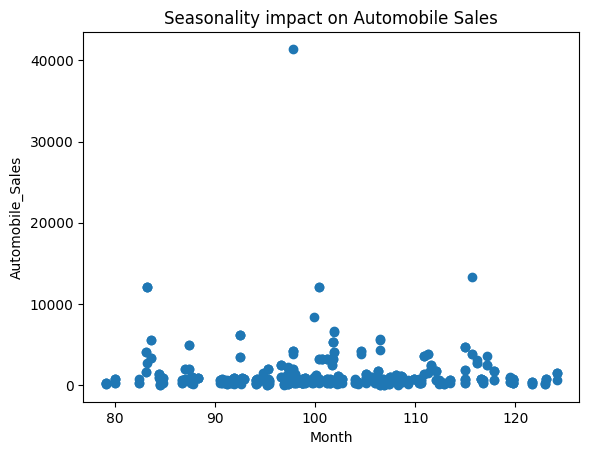

In [44]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

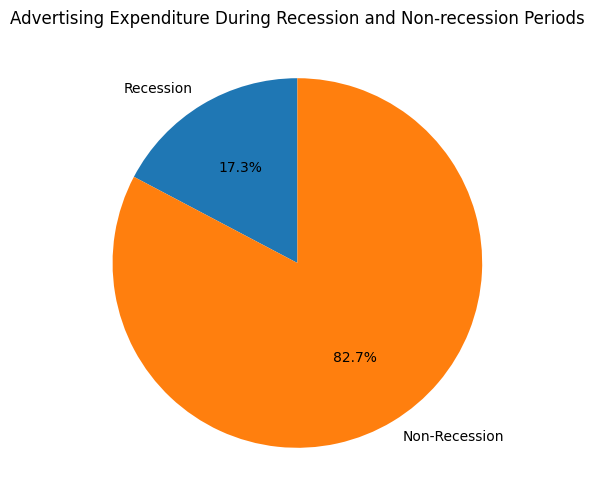

In [49]:
 
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure During Recession and Non-recession Periods')

plt.show()

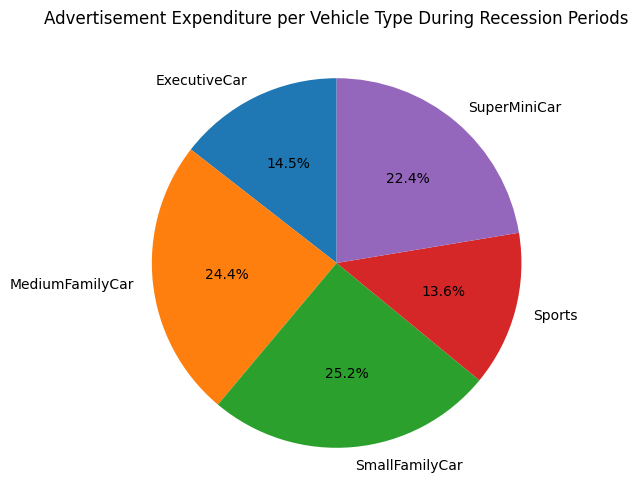

In [53]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8,6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertisement Expenditure per Vehicle Type During Recession Periods')

plt.show()


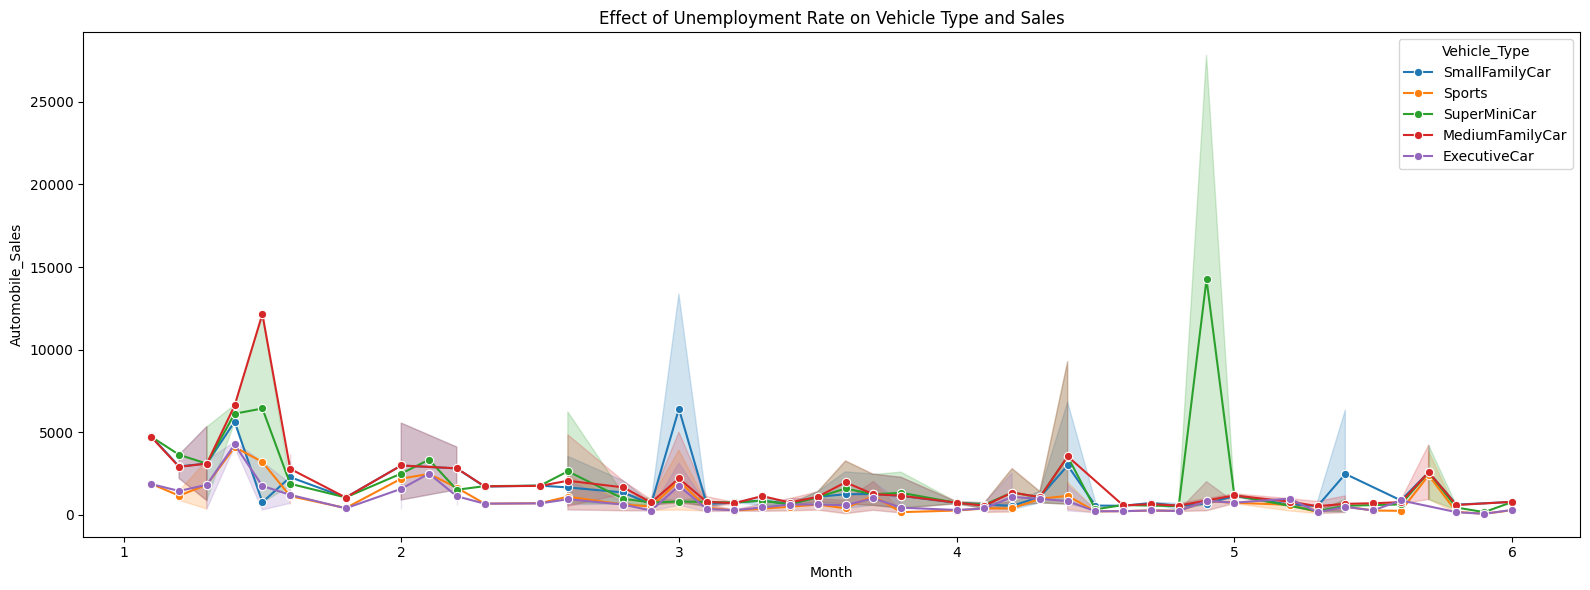

In [56]:
#TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

# Assuming 'df' is your dataset
df_rec = df[df['Recession'] == 1]

# Set figure size
plt.figure(figsize=(16, 6))

# Create line plot showing effect of unemployment rate on automobile sales, by vehicle type
sns.lineplot(
    data=df_rec,
    x='unemployment_rate',               # Replace with unemployment rate column (e.g., 'unemployment_rate')
    y='Automobile_Sales',               # Replace with automobile sales column (e.g., 'Automobile_Sales')
    hue='Vehicle_Type',             # Replace with vehicle type column (e.g., 'Vehicle_Type')
    marker='o'
)

# Customize labels, legend, and title
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.legend(title='Vehicle_Type')

# Show plot
plt.tight_layout()
plt.show()
 

In [66]:
# OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

import requests
import json

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"

response = requests.get(url)

with open("us-states.json", "wb") as f:
    f.write(response.content)

print("Download complete.")

with open("us-states.json") as f:
    states = json.load(f)

# from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"


Download complete.


NameError: name 'pyfetch' is not defined